In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


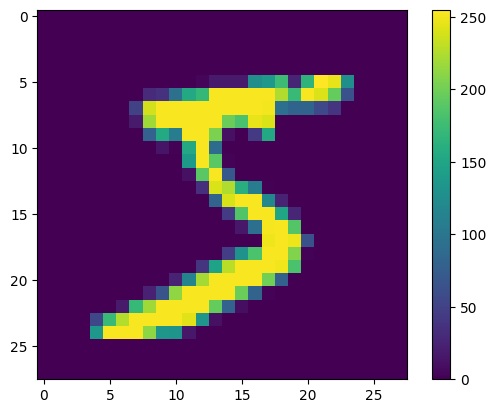

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

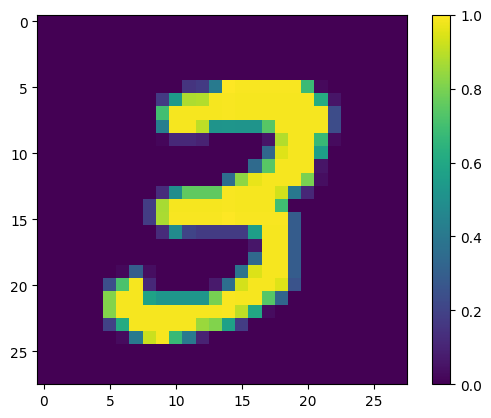

In [21]:
plt.figure()
plt.imshow(train_images[7].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

### Convolution Lyer
컨볼루션 연산을 하는 레이어 (필터를 자동으로 추출)
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
  > layers.Conv2D(kernel_size=(3,3), strides=(2,2), padding='valid', filters=16)
- kernel_size 필터 행렬의 크기
- strides 필터 한 스텝 이동하는 크기 (1, 1), (2, 2)
- padding 이미지 주변에 빈 값을 넣을지 지정하는 옵션 valid(빈 값 사용x)와 same(빈 값 사용, 0으로 쓰는 경우 zero padding)
- filters 필터의 개수 (너무 많을 경우 학습 속도가 느려질 수 있고 과적합이 발생할 수도 있음)
- VGG는 네트워크가 깊어질수록 필터 2배씩 늘림 (64->128->256->512)


### Pooling Layer
이미지 크기를 줄이면서 중요한 정보만 남기기 위해 subsampling 하는 기법 (계산할 정보가 줄어들기 때문에 오버피팅을 방지함)
- Average Pooling
- Max Pooling
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D
  > layers.MaxPool2D(pool_size=(2,2), strides=(2,2))
- pool_size 2,2 행렬 안에서 최대값만 남김
- strides conv에서와 동일하게 한 스템마다 이동하는 크기
- 위 옵션으로 사용하면 이미지 크기는 절반으로 줄어들게 됨

### Dense Layer
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
  > layers.Dense(units, activation=None)

### Dropout Layer
- 네트워크의 오버피팅을 막기위해 사용함
- 학습과정에서 무작위로 뉴련의 부분집합을 제거
- 학습과정에서는 확률적으로 일부 뉴런 연결을 끊고, 테스트할 때는 모든 값을 포함해서 계산함
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
  > layers.Dropout(rate=0.3)
- rate 제외할 뉴련의 비율

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9949 - loss: 0.0163
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9970 - loss: 0.0101
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9970 - loss: 0.0093
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9973 - loss: 0.0088
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9969 - loss: 0.0097
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9974 - loss: 0.0075
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9983 - loss: 0.0050
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9978 - loss: 0.0071


In [16]:
# optimizers
from keras import optimizers
dir(optimizers)

['Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'Ftrl',
 'Lion',
 'LossScaleOptimizer',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'deserialize',
 'get',
 'legacy',
 'schedules',
 'serialize']

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9908 - loss: 0.0453


In [19]:
test_acc

0.9908000230789185